In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_moons, make_blobs
from IPython.display import HTML #we need this for displaying an animation when using an .ipynb file

In [2]:
import pyflashlight.nn as nn
import pyflashlight.losses as losses
import pyflashlight.helpers as helpers
from pyflashlight.engine import Scalar, Vector

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
random.seed(42)

First, we will download and visualize a dataset. 

First five X values:
 [[ 1.3320416  -0.2389992 ]
 [ 2.1360104   0.27558682]
 [ 1.09397614 -0.6957437 ]
 [ 1.79593866  0.50123489]
 [ 0.81701107  0.52726427]]

First five y values:
 [ 1  1  1  1 -1]


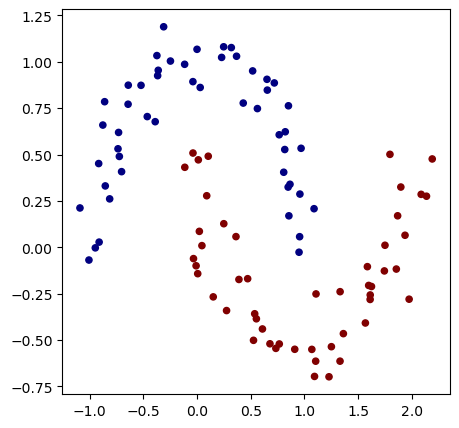

In [4]:
# First, we will download and visualize a dataset in 2D
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1     # make y be -1 or 1 (instead of 0 or 1)
print(f"First five X values:\n {X[:5]}\n")
print(f"First five y values:\n {y[:5]}")
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

Now, we will instantiate the model and the training data using PyFlashlight. 

In [5]:
model = nn.MLP(2, [16, 16, 1], activ='tanh') # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

Xs = [Vector(x) for x in X]
ys = Vector(y)

number of parameters 337


In [6]:
model.parameters()

[Scalar(data=0.2788535969157675, grad=0.0, label=L0w0-\>L1w0),
 Scalar(data=-0.9499784895546661, grad=0.0, label=L0w1-\>L1w0),
 Scalar(data=-0.4499413632617615, grad=0.0, label=L1b0),
 Scalar(data=-0.5535785237023545, grad=0.0, label=L0w0-\>L1w1),
 Scalar(data=0.4729424283280248, grad=0.0, label=L0w1-\>L1w1),
 Scalar(data=0.3533989748458226, grad=0.0, label=L1b1),
 Scalar(data=0.7843591354096908, grad=0.0, label=L0w0-\>L1w2),
 Scalar(data=-0.8261223347411677, grad=0.0, label=L0w1-\>L1w2),
 Scalar(data=-0.15615636062945915, grad=0.0, label=L1b2),
 Scalar(data=-0.9404055611238593, grad=0.0, label=L0w0-\>L1w3),
 Scalar(data=-0.5627240503927933, grad=0.0, label=L0w1-\>L1w3),
 Scalar(data=0.010710576206724776, grad=0.0, label=L1b3),
 Scalar(data=-0.9469280606322728, grad=0.0, label=L0w0-\>L1w4),
 Scalar(data=-0.602324698626703, grad=0.0, label=L0w1-\>L1w4),
 Scalar(data=0.2997688755590464, grad=0.0, label=L1b4),
 Scalar(data=0.08988296120643335, grad=0.0, label=L0w0-\>L1w5),
 Scalar(data=-0

We also need to define some information for plotting predicted contours later on

In [7]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [Vector(xrow) for xrow in Xmesh]
Zs = []

Let's train!

In [8]:
for epoch in range(50):

    # Forward pass
    model.zero_grad()
    y_preds = list(map(model, Xs))
    loss = losses.mean_squared_error(ys, y_preds)

    # Back propagation
    loss.backward()

    # Gradient descent (using the entire training set)
    learning_rate = 1.0 - 0.9*epoch/100 # 
    for p in model.parameters():
        p.data += -learning_rate * p.grad
    print(epoch, loss.data)

    # Calculating predicted contour
    scores = list(map(model, inputs))
    Z = np.array([s.data > 0 for s in scores])
    Z = Z.reshape(xx.shape)
    Zs.append(Z)


0 1.4890659883438437
1 1.0481979813710753
2 0.9190826843615583
3 0.8477043763840781
4 0.8163692734460092
5 0.7917289027083354
6 0.8221976663419613
7 0.7662212663699629
8 0.7727930908517453
9 0.7844021391037285
10 0.7637061054925054
11 0.7607746081569711
12 0.7325991811976583
13 0.7209138493497301
14 0.6815457668014189
15 0.6318001505022273
16 0.6159673303105219
17 0.5536342177023891
18 0.5358255576273926
19 0.5337431207966877
20 0.5443372006926599
21 0.5101214175718213
22 0.42617886979502273
23 0.36286859881302647
24 0.31738452923025856
25 0.25892097982482165
26 0.3024625390744526
27 0.22216052294292102
28 0.16805880726236028
29 0.2402103773366229
30 0.3914939497891619
31 0.2917096573936408
32 0.26095215266681765
33 0.18427532495270035
34 0.13569025139666793
35 0.18152069358409453
36 0.11404288389668191
37 0.15021381004180875
38 0.18054563890061398
39 0.24801479096107784
40 0.12270619614236034
41 0.05019639975937913
42 0.03316639598718732
43 0.026038498656505867
44 0.02187305782602366


Since we stored predictions of a background meshgrid for each epoch during training (`Zs`), we can visualize how the model learned over time.

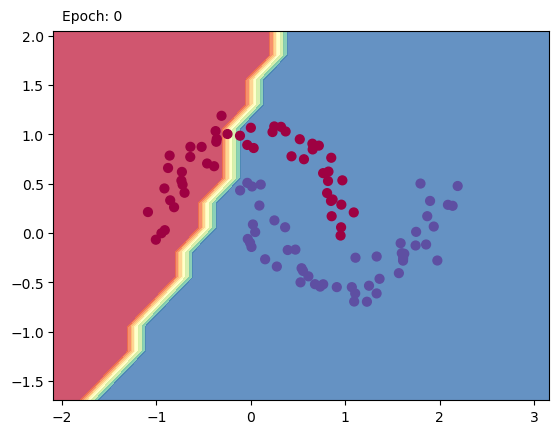

In [11]:
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, Zs[0], cmap=plt.cm.Spectral, alpha=0.8)
sct = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
txt = ax.text(-2.0,2.2, f"Epoch: 0", va='center')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 

def animate(i):
    global cf
    for coll in cf.collections:
        coll.remove()
    Z = Zs[i]
    cf = ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    sct = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    txt.set_text(f"Epoch: {i}")   

    return cf

anim = animation.FuncAnimation(fig, animate, frames=len(Zs), repeat=False)

plt.show()
HTML(anim.to_html5_video())